<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_session_3/Solution_Programming_Session_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 3 - Credit Risk Prediction Solution </center>


# Data Analysis and Model Fine-tuning Tutorial

## Outline

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)
  - [Preprocessing numerical variables](#Preprocessing-numerical-variables)
- [Finetuning a Supervised Model](#Finetuning-a-Supervised-Model)
  - [Evaluation Metrics](#Evaluation-Metrics)
  - [Fine Tuning Random Forest](#Fine-Tuning-Random-Forest)
- [Adjusting the threshold](#Adjusting-the-threshold)
  - [A small review](#A-small-review)
  - [Adjusting the probability threshold](#Adjusting-the-probability-threshold)

## Introduction

Welcome to this comprehensive data analysis and model fine-tuning tutorial. Our journey will explore various aspects of handling, analyzing, and making predictions from complex datasets.

## Challenge

The primary challenge we face is optimizing model performance for classification problems, particularly in contexts with imbalanced datasets, such as fraud detection or disease prediction.

## DataSet Overview

We will be working with a dataset that, while synthetic, closely resembles real-world data in structure and complexity. It includes both numerical and categorical features, presenting a common scenario in data analysis and machine learning tasks.
This dataset comprises records of individuals who have obtained loans from a bank.

- **Target Variable:** `loan_status` (0 or 1)
  - `1` for default cases.
  - `0` for non-default cases.
- The problem is framed as a **binary classification problem**.

Note: The dataset presents a considerable imbalance.

The goal is to predict the binary target, `loan_status`, using the following features:
- **person_age** (Numerical): Age of the borrower.
- **person_income** (Numerical): Annual income of the borrower.
- **person_home_ownership** (Categorical): Home ownership status of the borrower, with categories 'MORTGAGE', 'RENT', 'OWN', 'OTHER'.
- **person_emp_length** (Numerical): Length of employment in years.
- **loan_intent** (Categorical): Purpose of the loan, with categories 'VENTURE', 'DEBTCONSOLIDATION', 'HOMEIMPROVEMENT', 'MEDICAL', 'EDUCATION', 'PERSONAL'.
- **loan_grade** (Categorical): Loan grade, with categories 'A', 'C', 'D', 'B', 'E', 'F', 'G'.
- **loan_amnt** (Numerical): Amount of the loan.
- **loan_int_rate** (Numerical): Interest rate of the loan.
- **loan_percent_income** (Numerical): The loan amount as a percentage of the borrower's income.
- **cb_person_default_on_file** (Categorical): Indicates whether there is a historical default ('N' for no, 'Y' for yes).
- **cb_person_cred_hist_length** (Numerical): Length of the borrower's credit history.

## Objectives

Our main goals in this tutorial are to:
1. Explore and understand the dataset through loading and visualization techniques.
2. Implement preprocessing steps for both categorical and numerical data to prepare it for modeling.
3. Fine-tune a supervised machine learning model, specifically a Random Forest classifier, to better predict outcomes.
4. Learn how to adjust the decision threshold of our model to reflect the priorities and needs of specific business outcomes or research questions.


# 1. Exploring the dataset

---
<font color=green>Q1:</font>
<br><font color='green'>
Import the fundamental libraries that provide the necessary tools for data manipulation, visualization, and machine learning.
</font>

---


In [ ]:
import pandas as pd # for dataframes
import numpy as np # for arrays
import seaborn as sns # for fancy plots
import matplotlib.pyplot as plt # as usual for plots
import sklearn
import os
plt.style.use("dark_background")

---
<font color=green>Q2:</font>
<br><font color='green'>
Load the dataset directly into pandas using the command `pd.read_csv(<paste_the_raw_url_here>, index_col=0)`. Obtain the 'url' by navigating to the GitHub page of the dataset, clicking on the file, and then clicking on "Raw" to access the raw URL.
</font>

---

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jandsy/ml_finance_imperial/main/Programming_Sessions/Programming_session_3/credit_dataset.csv', index_col = 0)

---
<font color=green>Q3:</font>
<br><font color='green'>
Randomize the order of the dataset's rows.
</font>

---

In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

---
<font color=green>Q4:</font>
<br><font color='green'>
Display the first and last 5 rows of the `df` dataset.

</font>

---

In [ ]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,30000,RENT,3.0,MEDICAL,D,5300,15.28,1,0.18,Y,3
1,29,142000,OWN,14.0,PERSONAL,B,24250,11.48,0,0.17,N,8
2,37,86500,MORTGAGE,13.0,EDUCATION,A,6500,7.14,0,0.08,N,13
3,23,55000,OWN,6.0,MEDICAL,C,18500,13.16,0,0.34,N,4
4,23,36000,OWN,4.0,VENTURE,A,18000,7.88,0,0.50,N,2


In [ ]:
df.tail(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,40,165000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,9000,7.51,0,0.05,N,16
32577,26,32500,MORTGAGE,0.0,HOMEIMPROVEMENT,A,3500,8.59,0,0.11,N,2
32578,26,85000,MORTGAGE,10.0,VENTURE,C,2200,13.43,0,0.03,N,3
32579,26,30000,RENT,2.0,MEDICAL,A,6000,6.54,0,0.20,N,2
32580,37,30480,OWN,1.0,MEDICAL,B,1200,11.99,0,0.04,N,15


---
<font color=green>Q5:</font>
<br><font color='green'>
Use `df.info()` to determine the dataset's total number of rows and check for the presence of missing values.
</font>

---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


---
<font color=green>Q6:</font>
<br><font color='green'>
Create two lists: `catvars` for the categorical variables named  and `numvars` for numerical variables.
</font>

---

In [ ]:
df_cat = df.select_dtypes(include = "object")

In [ ]:
df_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [ ]:
#create quickaccess list with categorical variables labels
catvars = list(df.select_dtypes(include = 'object').columns)
#create quickaccess list with numerical variables labels
numvars = list(df.select_dtypes(exclude = 'object').columns)
numvars.remove("loan_status")

---
<font color=green>Q7:</font>
<br><font color='green'>
Split the dataset into a training set,  `df_train`, comprising 70% of the data, and a test set, `df_test`, containing the remaining 30% as described in the figure below.

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1ZbYtw7eU6KdGkIhLUfwsYFZWPMg61jer"></center>

In [ ]:
# Threshold
threshold = 0.7*len(df)

# Splitting the dataset
df_train = df.loc[:threshold]
df_test = df.loc[threshold:].reset_index(drop=True)

In [ ]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22807 training samples
We have 9774 testing samples


### 1.2 Adding a new categorical feature

---
<font color=green>Q8:</font>
<br><font color='green'>
Display the subtrain-dataframe that contains the numerical variables.
</font>

---

In [ ]:
df_train[numvars]

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,24,30000,3.0,5300,15.28,0.18,3
1,29,142000,14.0,24250,11.48,0.17,8
2,37,86500,13.0,6500,7.14,0.08,13
3,23,55000,6.0,18500,13.16,0.34,4
4,23,36000,4.0,18000,7.88,0.50,2
...,...,...,...,...,...,...,...
22802,21,56000,4.0,20000,17.39,0.36,3
22803,27,27000,3.0,6900,9.99,0.26,7
22804,22,34000,3.0,5000,8.00,0.15,4
22805,31,85000,1.0,18500,7.51,0.18,7


---
<font color=green>Q9:</font>
<br><font color='green'>
Employ `df.describe()` to analyze the distribution characteristics of the numerical features of the dataset.
</font>

---

In [ ]:
df_train[numvars].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22807.000000,2.280700e+04,22807.000000,22807.000000,22807.000000,22807.000000,22807.000000
mean,27.726312,6.658299e+04,4.778577,9617.102205,10.998076,0.169909,5.815013
std,6.375335,6.731972e+04,3.995008,6366.755822,3.094300,0.106924,4.066537
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.504400e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.984600e+04,7.000000,12250.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


---
<font color=green>Q10:</font>
<br><font color='green'>
Create a new categorical feature `category_income` based on person_income values, categorized into 'A', 'B', 'C', or 'D' according to specified income ranges:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.
</font>

---

In [ ]:
# Age intervals
intervals = (0, 39000, 55000, 79000, 7000000)
# Categories
categories = ["D", "C", "B", "A"]
# Create the new feature
df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)
df_test["category_income"] = pd.cut(df_test.person_income, intervals, labels=categories)

<ipython-input-15-029d490f762e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)


In [ ]:
df_train.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,category_income
0,24,30000,RENT,3.0,MEDICAL,D,5300,15.28,1,0.18,Y,3,D
1,29,142000,OWN,14.0,PERSONAL,B,24250,11.48,0,0.17,N,8,A
2,37,86500,MORTGAGE,13.0,EDUCATION,A,6500,7.14,0,0.08,N,13,A
3,23,55000,OWN,6.0,MEDICAL,C,18500,13.16,0,0.34,N,4,C
4,23,36000,OWN,4.0,VENTURE,A,18000,7.88,0,0.50,N,2,D
5,32,156000,MORTGAGE,14.0,PERSONAL,B,10000,9.63,0,0.06,N,9,A
6,43,25000,RENT,6.0,MEDICAL,B,8000,11.99,1,0.32,N,17,D
7,24,144000,MORTGAGE,4.0,DEBTCONSOLIDATION,C,8000,14.72,0,0.06,N,4,A
8,27,42000,RENT,1.0,PERSONAL,B,5000,10.99,0,0.12,N,10,C
9,29,62000,MORTGAGE,14.0,EDUCATION,E,9600,18.39,0,0.15,N,10,B


---
<font color=green>Q11:</font>
<br><font color='green'>
Include the newly created `category_income` feature in the `catvars` list, which holds categorical variables.
</font>

---

In [ ]:
catvars.append("category_income")

In [ ]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

# 2. Visualization

### 2.1 Count plot for a categorical variable.

A **count plot** is essentially a histogram for categorical variables, displaying the number of observations within each category through bars.


---
<font color=green>Q12:</font>
<br><font color='green'>
To visualize the distribution of the `'person_home_ownership'` variable with counts separated by target values (0 or 1), utilize `seaborn.countplot` and specify the hue parameter for the target variable differentiation.
</font>

---

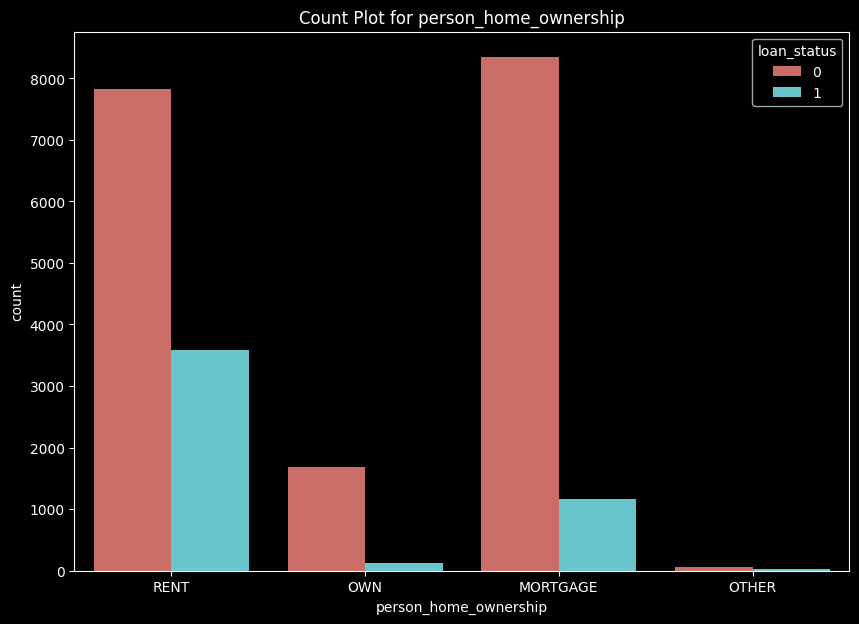

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
plt.title("Count Plot for person_home_ownership")
plt.show()

### 2.2 Numerical variable distribution

To plot the univariate distribution of a numerical variable for two groups corresponding to "0" and "1" targets, we consider using separate distribution plots for each target value.

---
<font color=green>Q13:</font>
<br><font color='green'>
To display the distribution of the `person_income` variable for "0" and "1" targets, use `seaborn.distplot` for each target group separately, ensuring clear differentiation between them.
</font>

---

<ipython-input-19-62de70f5c71c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
<ipython-input-19-62de70f5c71c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train[df_train["loan_status"]==1]["person_income"], color

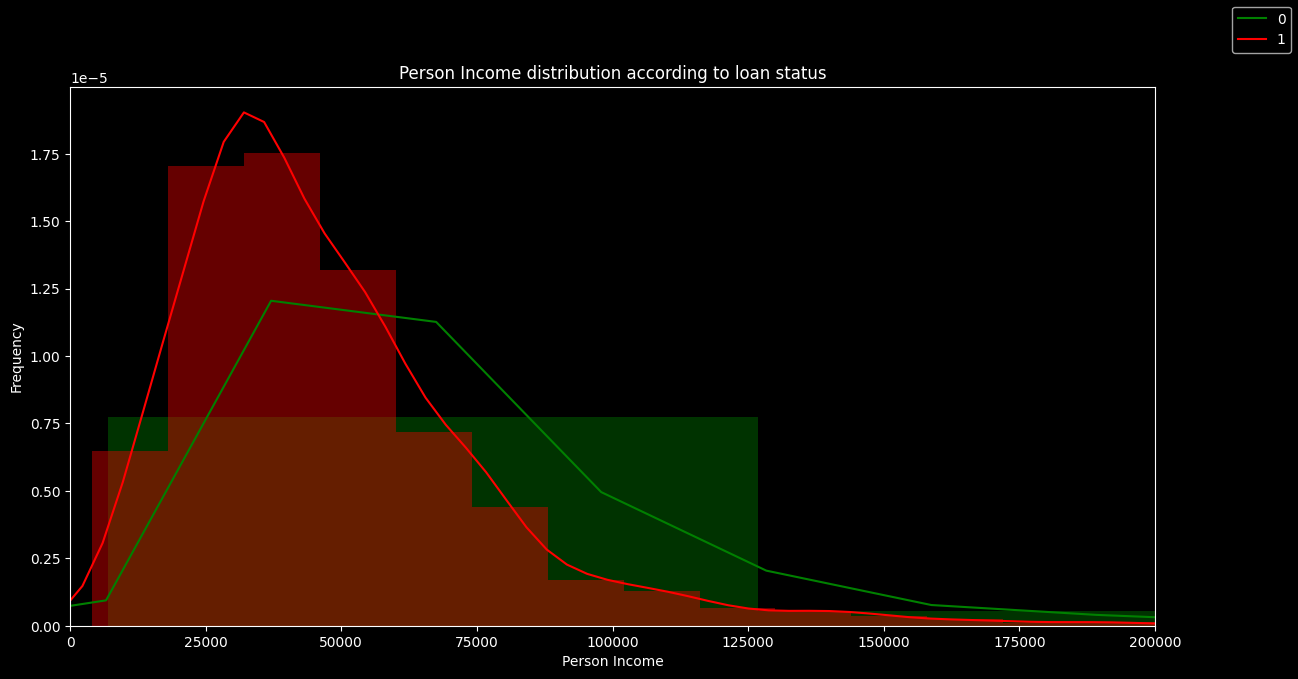

In [ ]:
fig =plt.figure(figsize=(14, 7))
g = sns.distplot(df_train[df_train["loan_status"]==0]["person_income"], color="g")
g = sns.distplot(df_train[df_train["loan_status"]==1]["person_income"], color="r")
g.set_xlabel("Person Income")
g.set(xlim=(0, 200000))
g.set_ylabel("Frequency")
g.set_title("Person Income distribution according to loan status")
fig.legend(labels=["0", "1"])
plt.show()

---
<font color=green>Q14:</font>
<br><font color='green'>
How do these distributions compare in terms of their characteristics and differences?
</font>

---

---
We can see that the distribution of `person_income` associated the target '0' (No default) is shifted to the right, in comparison with the one associated with the target '1' (default).
The distribution of person_income for the target '0' (No default) appears to be skewed towards higher values compared to the distribution for the target '1' (Default).

---

### 2.3 Boxplots

To illustrate the distribution of a numerical variable across different categories, we employ box plots. Box plots visualize data distributions through a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Here's a breakdown of these components:

- **Median (Q2/50th Percentile):** The central value in the dataset.
- **First Quartile (Q1/25th Percentile):** The median between the smallest value (excluding the "minimum") and the dataset's median.
- **Third Quartile (Q3/75th Percentile):** The median between the dataset's median and its highest value (excluding the "maximum").
- **Interquartile Range (IQR):** The range between the 25th and 75th percentiles.
- **Whiskers:** In a boxplot, the whiskers extend from the edges of the box (Q1 and Q3) to the smallest and largest values that are not considered outliers. Typically, whiskers extend to 1.5 * IQR above the third quartile and below the first quartile.
- **Outliers:** Data points that fall outside the range defined by the whiskers, typically represented as individual points.
- **Maximum:** The upper boundary for data considered non-outliers, calculated as Q3 + 1.5*IQR.
- **Minimum:** The lower boundary for data considered non-outliers, calculated as Q1 - 1.5*IQR.

Box plots provide a concise overview of the distribution's spread, central tendency, and potential outliers, facilitating comparisons across different categories.


<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1g3G3I6msJQ4iNXUUr_Z5cZAji14Dj5lk"></center>


---
<font color=green>Q15:</font>
<br><font color='green'>
Using `seaborn.boxplot`, describe the distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`.
</font>

---

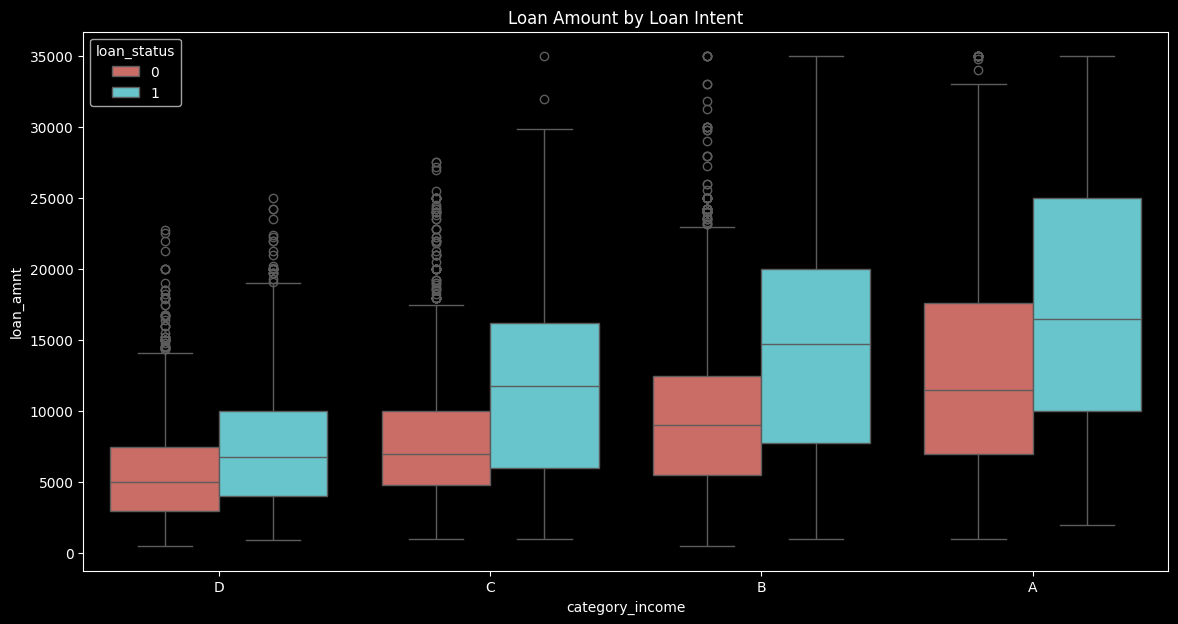

In [ ]:
fig = plt.figure(figsize=(14, 7))
g = sns.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Loan Intent")
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables

Assume there is a categorical variable X that can adopt K distinct values, denoted as $\{1, \dots, K\}$.

- **One-hot encoding** of a category involves converting the category into a vector in $\mathbb{R}^K$, where the vector contains a 1 in the position corresponding to the category and 0s elsewhere.

- For example, with $K=4$, the category represented by "3" in a sample would be one-hot encoded as the vector $[0, 0, 1, 0]$.

- This process allows a single categorical feature to be transformed into K binary features.

- **Considerations**:
  - **Dimensionality**: One-hot encoding can significantly increase the feature space with high-cardinality variables, potentially leading to sparse matrices and increased computational complexity.
  - **Alternative Methods**: Depending on context, alternatives like label encoding or embeddings may be more efficient, especially in handling categories with many levels.
  - **Dummy Variable Trap**: Given that each sample corresponds to only one category, these K binary features are not entirely independent; the value of the K-th feature can be inferred from the preceding K-1 features. Thus, it's common practice to omit one of the columns to avoid multicollinearity.
  - **Target Statistics**: An alternative approach, especially useful for categorical data with a strong correlation to the output variable, is the use of target statistics (or target encoding). This technique transforms a categorical variable into a numerical score based on the average value of the target for each category. For example, if 'X' is a categorical feature and 'Y' is the target, each category of 'X' is replaced by the mean of 'Y' observed for that category. This can provide a more meaningful input for predictive models, particularly when categories have an intrinsic order or a predictable impact on the target variable. We refer to Section 3.2 of (https://arxiv.org/pdf/1706.09516) for more details.




<center><img width="800" src = "https://drive.google.com/uc?export=view&id=1-WOjGo6OFQ0Cuq4mAmZ8oh6T2D6Y1gVL"></center>

---
<font color=green>Q16:</font>
<br><font color='green'>
For every categorical variable, list the names of its categories along with their respective counts.
</font>

---

The categories:

In [ ]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [ ]:
for categorical_variable in catvars:
  print(f"Feature: {categorical_variable} ... Categories: {df_train[categorical_variable].unique()}.. Count: {df_train[categorical_variable].nunique()}")

Feature: person_home_ownership ... Categories: ['RENT' 'OWN' 'MORTGAGE' 'OTHER'].. Count: 4
Feature: loan_intent ... Categories: ['MEDICAL' 'PERSONAL' 'EDUCATION' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT'].. Count: 6
Feature: loan_grade ... Categories: ['D' 'B' 'A' 'C' 'E' 'F' 'G'].. Count: 7
Feature: cb_person_default_on_file ... Categories: ['Y' 'N'].. Count: 2
Feature: category_income ... Categories: ['D', 'A', 'C', 'B']
Categories (4, object): ['D' < 'C' < 'B' < 'A'].. Count: 4


---
<font color=green>Q17:</font>
<br><font color='green'>
Determine the count of unique values for each categorical variable.
</font>

---

In [ ]:
df_train[catvars].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

In [ ]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [ ]:
numvars

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

---
<font color=green>Q18:</font>
<br><font color='green'>
Print the shape of `df_train` prior to applying One Hot Encoding.
</font>

---

In [ ]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables
df_train.shape

(22807, 13)

---
<font color=green>Q19:</font>
<br><font color='green'>
Transform each categorical variable, which has K categories, into K-1 new feature columns by employing either `pandas.get_dummies` or `sklearn.preprocessing.OneHotEncoder`, ensuring to drop one category to avoid multicollinearity.
</font>

---

In [ ]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [ ]:
df_train = pd.get_dummies(df_train,
                          columns=catvars,
                          drop_first=True)

In [ ]:
df_test = pd.get_dummies(df_test,
                         columns=catvars,
                         drop_first=True)

In [ ]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

---
<font color=green>Q20:</font>
<br><font color='green'>
Describe how the shape of `df_train` is altered following the application of One Hot Encoding.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1eEOIb904c2UOT82AUYdjaZINj9rVr1Ji"></center>

In [ ]:
df_train.shape

(22807, 26)

---
* Number of Dummy variables: 18.
  * person_home_ownership     ---->   4 possible values ----> 3 Dummy variables
  * loan_intent               ---->   6 possible values ----> 5 Dummy variables
  * loan_grade                ---->   7 possible values ----> 6 Dummy variables
  * cb_person_default_on_file ---->   2 possible values ----> 1 Dummy variable
  * category_income           ---->   4 possible values ----> 3 Dummy variables

* Number of Numerical variables: 7.

* One column for the target `loan_status`.

* Total number of columns: 26
---

In [ ]:
df_train.head(10)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,category_income_C,category_income_B,category_income_A
0,31,90400,9.0,9500,10.37,0,0.11,6,False,False,...,True,False,False,False,False,False,False,False,False,True
1,24,47000,8.0,7000,6.62,0,0.15,3,False,False,...,False,False,False,False,False,False,False,True,False,False
2,26,26400,10.0,8500,13.23,0,0.32,4,False,False,...,False,True,False,False,False,False,False,False,False,False
3,22,27996,5.0,5000,5.79,0,0.18,2,False,True,...,False,False,False,False,False,False,False,False,False,False
4,23,35004,4.0,5000,14.72,0,0.14,3,False,False,...,False,True,False,False,False,False,True,False,False,False
5,25,44400,6.0,14125,12.99,0,0.32,2,False,False,...,False,True,False,False,False,False,False,True,False,False
6,23,60000,6.0,7000,12.99,0,0.12,4,False,False,...,False,True,False,False,False,False,False,False,True,False
7,34,138000,14.0,25000,11.12,0,0.18,6,False,False,...,True,False,False,False,False,False,False,False,False,True
8,23,48000,1.0,10000,7.29,0,0.21,2,False,False,...,False,False,False,False,False,False,False,True,False,False
9,23,45000,2.0,3000,7.05,0,0.07,3,False,False,...,False,False,False,False,False,False,False,True,False,False


### 3.2 Preprocessing Numerical Variables

---
<font color=green>Q21:</font>
<br><font color='green'>
Divide `df_train` into feature and target subsets named `df_train_features` and `df_train_targets`, respectively, and similarly split `df_test` into `df_test_features` and `df_test_targets` as illustrated in the provided diagram.

</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1V0Sjgbbef6mdNSAwKAUQLeJlOWJU-3np"></center>

In [ ]:
df_train_targets = df_train['loan_status']
df_train_features = df_train.drop('loan_status',axis=1)

df_test_targets = df_test['loan_status']
df_test_features = df_test.drop('loan_status',axis=1)

---
<font color=green>Q22:</font>
<br><font color='green'>
Divide each of `df_train_features` and `df_test_features` as shown in the diagram below:

* `df_train_features_numvars` and `df_test_features_numvars` containing the training abd testing numerical features
* `df_train_features_rest` and `df_train_features_rest` containing the rest of the features.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1loF_Uk967CSVlGKikXWbDxwpKAEGaDlg"></center>

In [ ]:
df_train_features_numvars = df_train_features[numvars]
df_train_features_rest = df_train_features[df_train_features.columns[~df_train_features.columns.isin(numvars)]]


df_test_features_numvars = df_test_features[numvars]
df_test_features_rest = df_test_features[df_test_features.columns[~df_test_features.columns.isin(numvars)]]

---
<font color=green>Q23:</font>
<br><font color='green'>
Generate histograms for the numerical variables in `df_train_features_numvars`  by uzing the `hist()` method from the DataFrame Class.
</font>

---

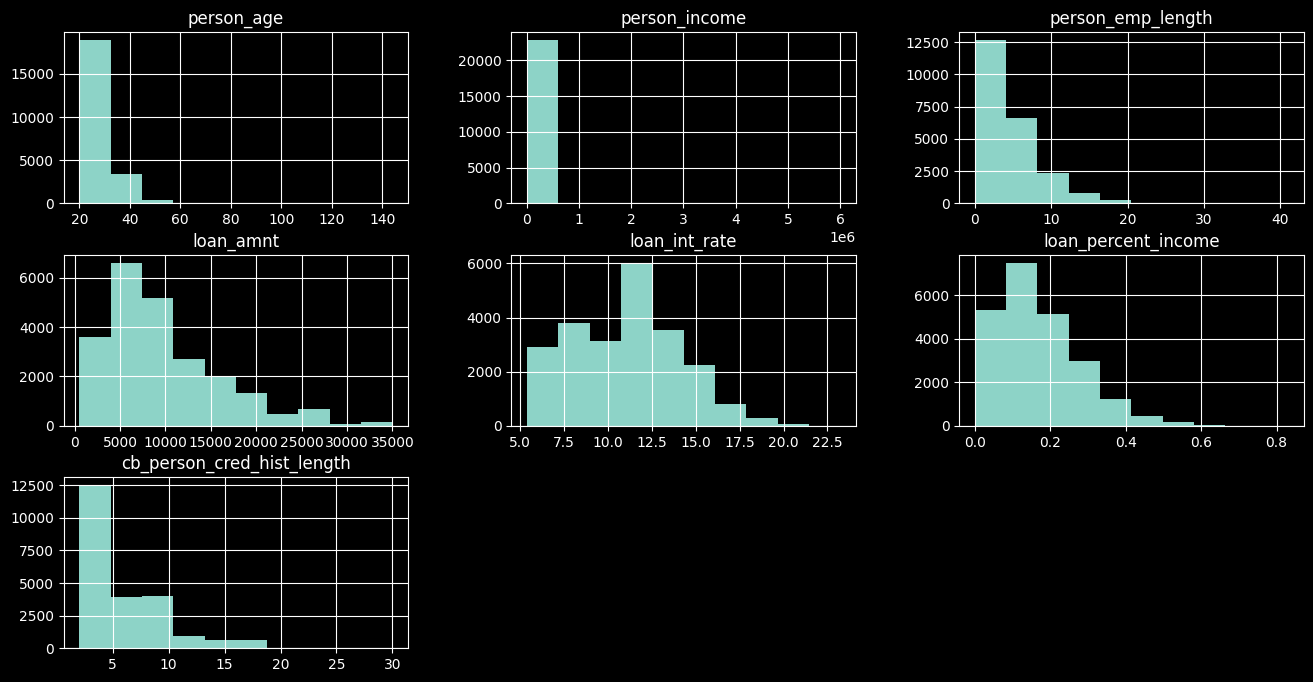

In [ ]:
df_train_features_numvars.hist(figsize=(16, 8))
plt.show()

There are two common approaches of scaling a numerical variable:

1. **Normalization (Min-Max Scaling):** This approach rescales a feature to a specific range, typically 0 to 1. It is done by subtracting the minimum value of the feature from each value and then dividing by the range (the maximum value minus the minimum value). Normalization is particularly useful when you need to ensure that the variables are bounded within a specific range.

2. **Standardization (Z-score Normalization):** This method involves removing the mean from each feature value and then dividing by the standard deviation, resulting in features that have a mean of 0 and a standard deviation of 1. Standardization is beneficial when the features should have the properties of a standard normal distribution, which can be advantageous for certain algorithms.


<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1UiUAyNligNF9TQkavRdatKR-4WI3pxqz"></center>

---
<font color=green>Q24:</font>
<br><font color='green'>
From `sklearn.preprocessing`, scale the numerical features using one of the two scaling methods:
  * `StandardScaler()` to achieve a distribution with a mean of 0 and a standard deviation of 1.
  * `MinMaxScaler()` to scale the data into the [0, 1] range.
</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1b2nPF0z0eMVwvH3g5Yu40AtKaQHFlMUa"></center>

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Instantiate models
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
# Fit and Transform the training numerical variables using StandardScaler
df_train_features_numvars_std = pd.DataFrame(standard_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using StandardScaler
df_test_features_numvars_std = pd.DataFrame(standard_scaler.transform(df_test_features_numvars))

# Fit and Transform the training numerical variables using MinMaxScaler
df_train_features_numvars_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_train_features_numvars))
# Transform the testing numerical variables using MinMaxScaler
df_test_features_numvars_minmax = pd.DataFrame(minmax_scaler.transform(df_test_features_numvars))

---
<font color=green>Q25:</font>
<br><font color='green'>
Display the histograms of the numerical features after the scaling process.
</font>

---

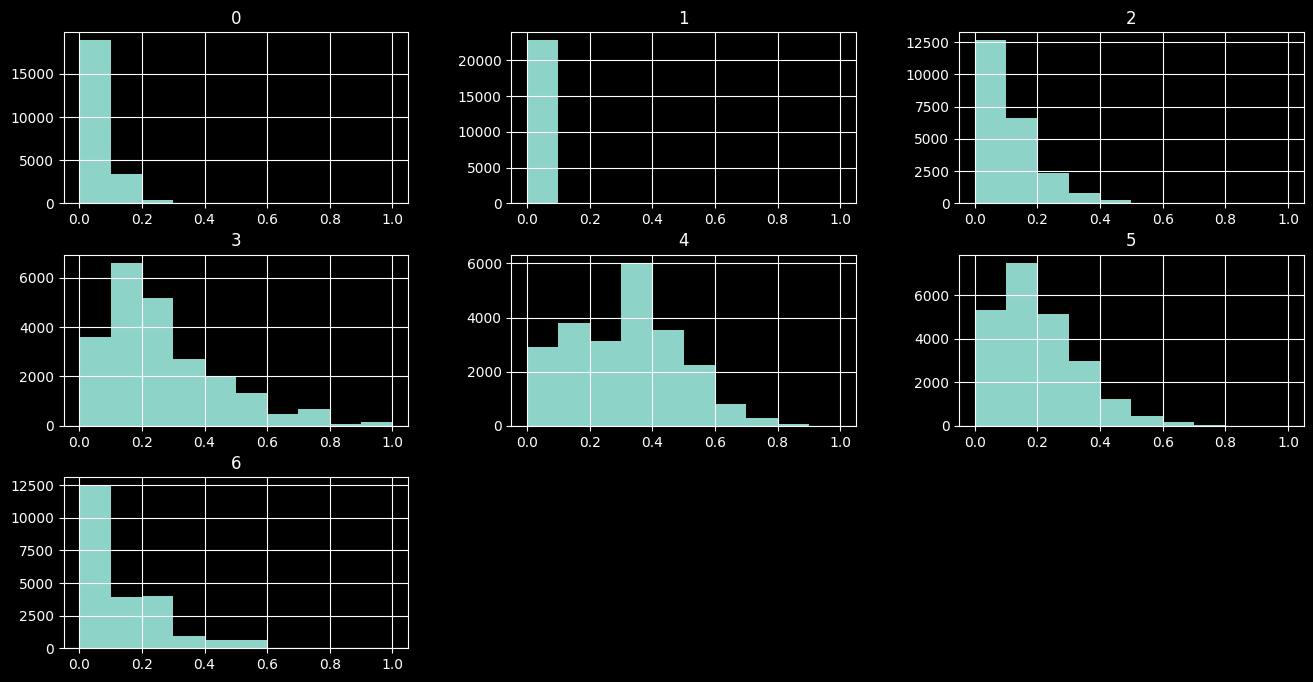

In [ ]:
df_train_features_numvars_minmax.hist(figsize=(16, 8))
plt.show()

---
<font color=green>Q26:</font>
<br><font color='green'>
Merge `df_train_features_rest` and the scaled numerical features dataframe `df_train_features_numvars_std` to form the complete dataframe `df_train_features_processed`.

</font>

---

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1VgznTzwgu32QTb6bjxdDzvu8gF5PyEvt"></center>

In [ ]:
df_train_features_processed = pd.concat([df_train_features_numvars_std, df_train_features_rest], axis=1)
df_test_features_processed = pd.concat([df_test_features_numvars_std, df_test_features_rest], axis=1)

---
<font color=green>Q27:</font>
<br><font color='green'>
Show the first 5 rows of the new dataset
</font>

---

In [ ]:
df_train_features_processed.head(5)

,0,1,2,3,4,5,6,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,category_income_C,category_income_B,category_income_A
0,-0.584502,-0.543434,-0.445210,-0.678084,1.383840,0.094379,-0.692254,False,False,True,...,False,False,True,False,False,False,True,False,False,False
1,0.199788,1.120306,2.308287,2.298379,0.155749,0.000853,0.537321,False,True,False,...,True,False,False,False,False,False,False,False,False,True
2,1.454651,0.295863,2.057969,-0.489601,-1.246861,-0.840881,1.766895,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0.741360,-0.172063,0.305744,1.395231,0.698695,1.590796,-0.446339,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,-0.741360,-0.454305,-0.194892,1.316696,-1.007706,3.087212,-0.938168,False,True,False,...,False,False,False,False,False,False,False,False,False,False


---
<font color=green>Q28:</font>
<br><font color='green'>
Print the shapes of `df_train_features_processed`, `df_train_targets`, `df_test_features_processed` and `df_test_targets`
</font>

---

In [ ]:
df_train_features_processed.shape

(22807, 25)

In [ ]:
df_train_targets.shape

(22807,)

In [ ]:
df_test_features_processed.shape

(9774, 25)

In [ ]:
df_test_targets.shape

(9774,)

---
<font color=green>Q29:</font>
<br><font color='green'>
Convert the aforementioned dataframes into `numpy` arrays to get `X_train`, `X_test`, `y_train`, `y_test`.
</font>

---

In [ ]:
X_train = df_train_features_processed.values
X_test = df_test_features_processed.values

y_train = df_train_targets.values
y_test = df_test_targets.values

# 4. Fine Tuning a Supervised Model

### 4.1 Evaluation Metrics

First, let's review the different evaluation metrics

---



<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1SbB_CEcOCblu1sUwzGAOwn5oQRQGEQxS"></center>

The F1 score is calculated as follows:

$$
\text{F1} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

---
<font color=green>Q30:</font>
<br><font color='green'>
What is the distribution of the target `loan_status` ?
</font>

---

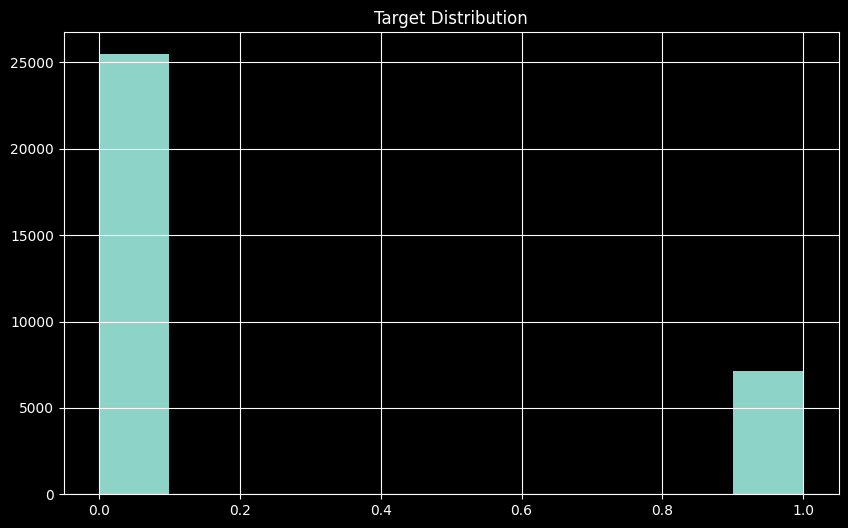

In [ ]:
df["loan_status"].hist(figsize=(10, 6))
plt.title("Target Distribution")
plt.show()

---
<font color=green>Q31:</font>
<br><font color='green'>
Which of the two errors is not adapted for the credit problem ?
</font>

---

---
The dataset is imbalanced, we should avoid optimizing the **accuracy score**.

The worst error is to predict a negative class (no default) to a sample that is actually in the positive class (i.e default).

Therefore, the metric we should optimize is the recall.

---

A brief review of Cross Validation:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1TQfP49ZaOoAq4Egt0NuIsWYLHb8Maris"></center>

---
<font color=green>Q32:</font>
<br><font color='green'>
Using `cross_val_score` from `sklearn.model_selection`, write a function that takes as inputs the **classifier**, the **training features** and the **training targets**. The function should output the distribution (the mean and the std) of the following performance measures using cross validation (with K=5).

* Precision
* Recall
* f1 score
* auc
* accuracy
</font>

---

In [ ]:
# Import module
from sklearn.model_selection import cross_val_score
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X, y):
    precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

---
<font color=green>Q33:</font>
<br><font color='green'>
Write a function that employs `confusion_matrix` from `sklearn.metrics` that takes`y_test` and `y_hat` (a vector of predicted 0s and 1s) as inputs. This function should generate and display a plot of the confusion matrix for the test set.
</font>

---

In [ ]:
# Import module
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_hat):
  fig = plt.figure(figsize=(10, 8))
  g = sns.heatmap(confusion_matrix(y_test, y_hat),
              annot=True,
              fmt="0.0f")
  g.set_xlabel("Predicted")
  g.set_ylabel("Actual")
  g.set_title("Confusion Matrix")
  plt.show()



### 4.2 Fine Tuning Random Forest

Brief review of Hyperparameters Optimization:

<center><img width=“700" src = "https://drive.google.com/uc?export=view&id=1j93wPCK9TyV0oi_kj-UhijNJTLafH4fa"></center>

We aim to optimize the following hyperparameters:

* n_estimators: Number of trees in the forest.
* max_features: Maximum number of features considered for splitting a node.
* max_depth: Maximum number of levels in each decision tree.
* bootstrap: Sampling method for data points (with or without replacement) during training.

---
<font color=green>Q34:</font>
<br><font color='green'>
Define a dictionary named `random_grid` that associates each hyperparameter with a list of potential values. For instance:

- "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
- "max_features": ["auto", "sqrt"]
- "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
- "bootstrap": [True, False]

</font>

---

In [ ]:
[int(x) for x in np.linspace(10, 110, num = 11)]

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

In [ ]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [200, 250, 300, 350, 400]}


---
<font color=green>Q35:</font>
<br><font color='green'>
Employ `RandomizedSearchCV` from `sklearn.model_selection` in conjunction with `RandomForestClassifier` from `sklearn.ensemble` to search for the best combination of hyperparameters among 20 possibilities.


</font>

---

In [ ]:
# Import Modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier(random_state=42)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model_rf,
                               param_distributions = random_grid,
                               n_iter = 5,
                               cv = 3,
                               verbose=2,
                               scoring="f1",
                               random_state=42,
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, scoring='f1', verbose=2)

---
<font color=green>Q36:</font>
<br><font color='green'>
Print the hyperparameters of the best model `rf_best`?

</font>

---

In [ ]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=60, n_estimators=250, random_state=42)

In [ ]:
rf_best = rf_random.best_estimator_

---
<font color=green>Q37:</font>
<br><font color='green'>
Using `classification_report` from `sklearn.metrics`, display the different performance measures and the confusion matrix for the "optimal" model `rf_best`.
</font>

---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7573
           1       0.96      0.73      0.83      2201

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



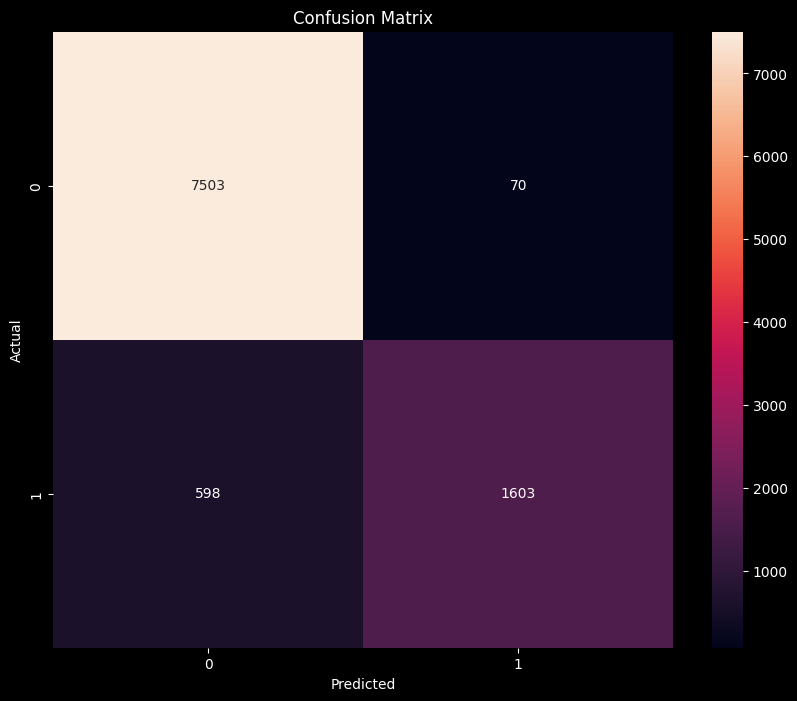

In [ ]:
# Evaluation performances
from sklearn.metrics import classification_report
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))
# Confusion Matrix
plot_confusion_matrix(y_test, y_hat)

# 5. Adjusting the threshold

### 5.1 A small review



As explained in Lecture 1, the AUC is defined as the area under the curve, i.e, the area between the curve and the x-axis.

* Let us consider a dataset $\mathcal{S} = \{ (x_1, y_1), \dots, (x_n, y_n) \}$ where $\forall i \in \{1, \dots, n\} \quad x_i \in \mathbb{R}^d, \ y_i \in \{0, 1\} \}$

* A classification algorithm (like Random Forest), trained on $\mathcal{S}$, maps each new obersvation $x^* \in \mathbb{R}^d$ to a score $\hat{p}(x^*) \in [0, 1]$ signifying the algorithm's confidence that the label of $x^*$ is $y^* = 1$.


* Let us split the training feature vectors  $\{(x_i)\}_{1 \leq i \leq n}$ into two groups:
  * A group $\mathcal{G}_+$ of feature vectors associated with the positive label.  
  * A group $\mathcal{G}_-$ of feature vectors associated with the negative label.

* We can then represent two distribution of scores:
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_+$
  * A distribution of the scores $\hat{p}(x)$ for each $x \in \mathcal{G}_-$

* The figure below summarizes the process described.

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=17AynSe1QDaiZR-_9FpVQMfOzKRdR_Lfi"></center>

* Let us represent the two distributions in one figure:

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1tKSqfs1ITKikr8F4oaRSs6t2HLN0hIIf"></center>


* The **AUC** can be interpreted as a measure of the quality of seperation between the aforementioned distributions.

* Mathematically speaking, the **AUC** gives the probability that the classifier gives a higher score to a positive sample than to a negative sample. (you can read the proof in the [optional reading](https://github.com/Jandsy/ml_finance_imperial/blob/main/Additional_Materials/Optional_Reading_Session_1.ipynb)).




* The method `rf_best.predict_proba()` maps each element $x$ to a prediction (or a score) $p(x) \in [0, 1]$ reflecting the confidence of the classifier in assigning the target $y=1$ to the feature vector $x$.


<center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1znqNbk_1GLWeTgxf3PU0HcGg1r1L-uLo"></center>


* In order to convert the continuous prediciton $p(x)$ into a binary prediction $\hat{y} \in \{0, 1 \}$, we need to choose a **threshold** above which we assign the positive label.

* The default threshold is 0.5 and the method used to map $x$ to a binary output with this default threshold 0.5 is `rf_best.predict()`

### 5.2 Adjusting the probability threshold

**Our objective in this section is to adjust the threshold in order to match a desired recall**

In order to plot the ROC curve, you will have to install `plot_metric` using the following command line:

```
!pip install plot_metric
```

In [ ]:
!pip install plot_metric

---
<font color=green>Q38:</font>
<br><font color='green'>
Plot the ROC curve of the best model `rf_best` using `BinaryClassification` from `plot_metric.functions`
</font>

---


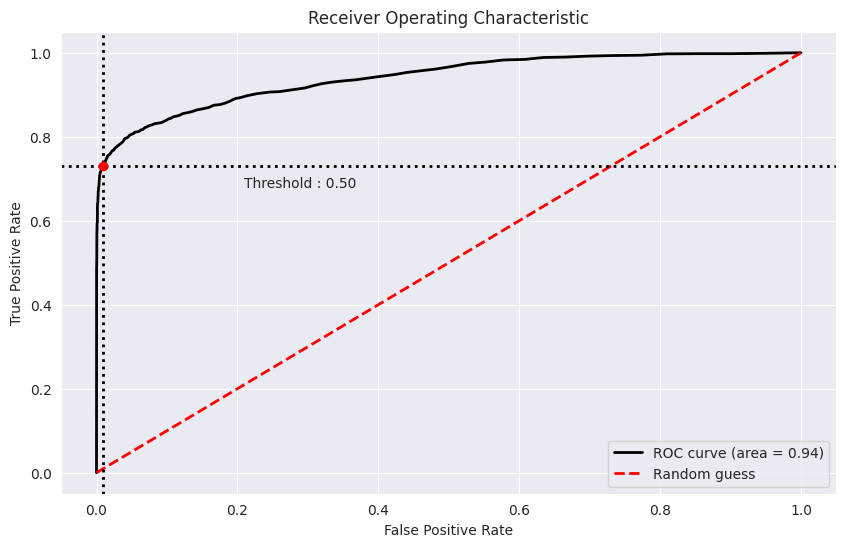

In [ ]:
# Import module
from plot_metric.functions import BinaryClassification

# Plot the ROC curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], labels=[0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_hat = rf_best.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7573
           1       0.96      0.73      0.83      2201

    accuracy                           0.93      9774
   macro avg       0.94      0.86      0.89      9774
weighted avg       0.93      0.93      0.93      9774



---
<font color=green>Q39:</font>
<br><font color='green'>
Let us fix an objective recall of 0.8. By decreasing the threshold progressively from 1 to 0, determine the maximum threshold for which we can have a recall of 0.8, called `best_threshold`
</font>

---


In [ ]:
# Let us find the threshold with the highest recall
from sklearn.metrics import recall_score
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

# The objective recall
OBJECTIVE_RECALL = 0.8

# Initialize the best threshold to 0.5
best_threshold = 0.5
# Calculate the binary prediction y_hat associated with the threshold 0.5
y_hat = (y_hat_proba > best_threshold)
# Calculate the recall associated with the threshold 0.5
best_recall = recall_score(y_test, y_hat)

# Find the best threshold
for th in np.arange(0.01, 1, 0.01)[::-1]:
  # Calculate the binary prediction y_hat associated with the threshold th
  y_pred = (y_hat_proba > th)
  recall = recall_score(y_test, y_pred)
  if recall > OBJECTIVE_RECALL:
    best_recall = recall
    best_threshold = th
    break
print("The best Threshold is {}...The best recall is {}".format(best_threshold, best_recall))

The best Threshold is 0.29000000000000004...The best recall is 0.8046342571558383


---
<font color=green>Q40:</font>
<br><font color='green'>
Plot the ROC curve and show the point with the coordinated (FPR(best_threshold), TPR(best_treshold)).
</font>

---

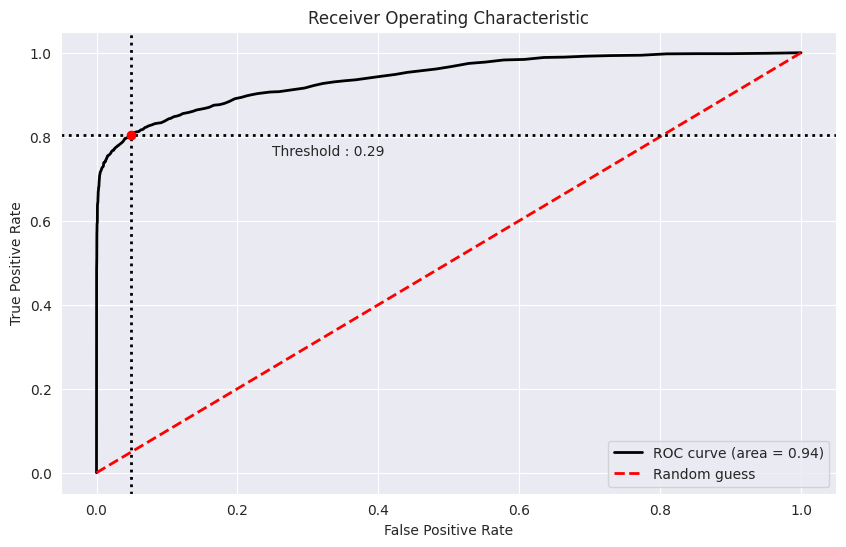

In [ ]:
# let's use another probability threshold so that we can get to the elbow position in the above curve
bc = BinaryClassification(y_test, rf_best.predict_proba(X_test)[:, 1], threshold=best_threshold, labels = [0, 1])
plt.figure(figsize=(10, 6))
bc.plot_roc_curve()
plt.show()

---
<font color=green>Q41:</font>
<br><font color='green'>
Plot the confusion matrix associated with `best_threshold`
</font>

---


In [ ]:
# Calculate the prediction scores y_hat_proba associated with X_test
y_hat_proba = rf_best.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate the binary prediction y_hat associated with the threshold th
y_hat = (y_hat_proba >= best_threshold)

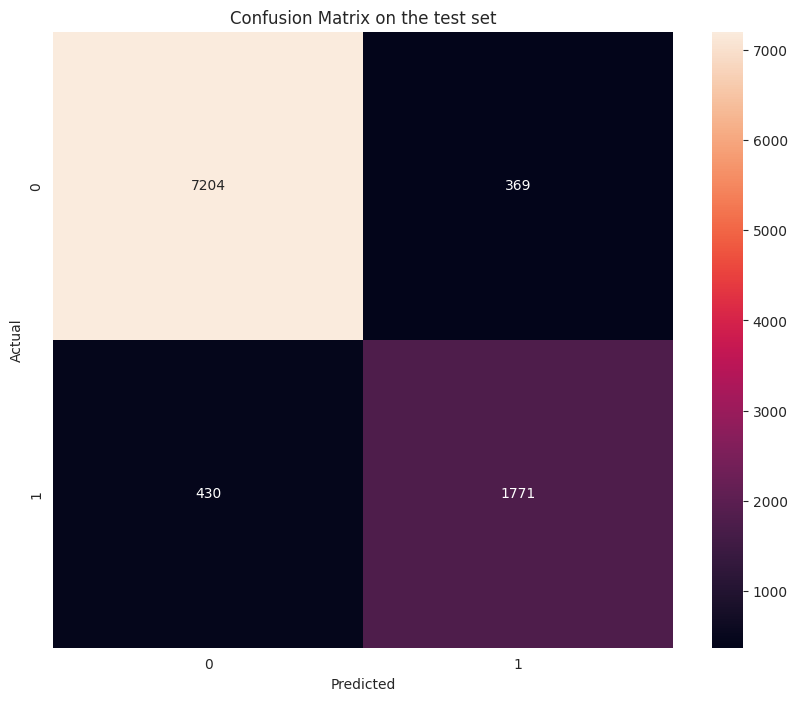

In [ ]:
# plot the confusion matrix
fig = plt.figure(figsize=(10, 8))
g = sns.heatmap(confusion_matrix(y_test, y_hat),
            annot=True,
            fmt="0.0f")
g.set_xlabel("Predicted")
g.set_ylabel("Actual")
g.set_title("Confusion Matrix on the test set")
plt.show()

---
<font color=green>Q42:</font>
<br><font color='green'>
Print the evaluation metrics associated with `best_threshold`
</font>

---


In [ ]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7573
           1       0.83      0.80      0.82      2201

    accuracy                           0.92      9774
   macro avg       0.89      0.88      0.88      9774
weighted avg       0.92      0.92      0.92      9774



# Conclusion:

During this session, we learned about:
1. Loading and visualizing a dataset.
2. Processing categorical and numerical features.
3. Selecting suitable evaluation metrics for imbalanced datasets, particularly recall and AUC.
4. Adjusting the probability threshold to match the objective error of a business problem.


# Optional Exercise: Resampling techniques

* The main problem when we train a model using an imbalanced dataset is that it results in a biased classifier towards the majority class.

* There are two ways to overcome this bias problem:
  * **Undersampling**: In this case, we randomly select as many observations of the majority class $\mathcal{G}_-$ as we have for the minority class $\mathcal{G}_+$. (See figure below)
  
  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=106_U8l014dk7LybyoPpUEiLlABfeWbhZ"></center>

  * **Oversampling**: In this case, we prefer to have more elements from the minority class $\mathcal{G}_+$. Hence, we either create duplicates of the minority class or create synthetic datapoints so that we reach $|\mathcal{G}_-|$ samples (where $|F|$ denotes the number of elements of $F$). One way of creating synthetic data points is called the **SMOTE** (Synthetic Minority Oversampling Technique). The method is described in [Synthetic Minority Over-sampling Technique](https://arxiv.org/pdf/1106.1813.pdf) and can be summarized as follows:
    * First, a random example $x_1$ is chosed from the minority class $\mathcal{G}_+$.
    * Then, we find the k nearest neighbors for that example (typically $k=5$).
    * We randomly select one of these k neighbors, let's call it $x_2$.
    * The synthetic instances are generated as a convex combination of the two instances $x_1$ and $x_2$.

  <center><img width=“500" src = "https://drive.google.com/uc?export=view&id=1j2EGBKoXKdI66mynmgdIYlRT2HWpdhrQ"></center>


---
<font color=green>Optional questions:</font>
<br><font color='green'>
* Finetune the model after using the SMOTE oversampling method.
* Try different supervised models to improve the results.
</font>

---
